In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [45]:
df = pd.read_csv('cnbc.csv')

In [46]:
# Praproses teks
max_features = 2000  # Jumlah kata yang akan di-tokenisasi
max_len = 300  # Panjang maksimum dari setiap sequence

tokenizer = Tokenizer(num_words=max_features, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Stem_article'])
X = tokenizer.texts_to_sequences(df['Stem_article'])
X = pad_sequences(X, maxlen=max_len)


In [47]:
# Menggabungkan X dan y untuk memudahkan undersampling
data = pd.DataFrame(X)
data['polarity'] = y

# Pisahkan kelas mayoritas dan minoritas
majority = data[data['polarity'] == 0]
minority = data[data['polarity'] == 1]

In [48]:
# Undersample kelas mayoritas
majority_undersampled = resample(majority,
                                 replace=False,  # Tidak mengganti sampel
                                 n_samples=len(minority),  # Cocokkan jumlah dengan kelas minoritas
                                 random_state=42)  # Untuk reproduktifitas


In [49]:
# Gabungkan kembali kelas mayoritas yang undersampled dengan kelas minoritas
undersampled_data = pd.concat([majority_undersampled, minority])

# Pisahkan kembali X dan y
X = undersampled_data.drop('polarity', axis=1).values
y = undersampled_data['polarity'].values


In [50]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Bangun model LSTM
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

c:\Users\Anjelita Malik\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_4             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Display some samples of tokenization results
print("Contoh hasil tokenisasi dan padding:")
for i in range(3):
    print(X[i])

Contoh hasil tokenisasi dan padding:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0   16  236   11    1  232   81  376  403
   97   19   19   16  549   69  182   23    1  232   19  536 1165  148
    1  232    1  483  119   33  530 1023  713  175  255    6   24 1032
 1081    6  232  556    1 1302    1   36  103   31    4    3    6    7
  252    1    1 1071  453  519   17    5  679  659  478    1  955  530
   72  175   88  126  154    6   24 1032 1081  837    1  232   11   70
  291  870    1  253  148  408   97    1  679   77   28  536  572  569
    6    1   11   21    1  253   23    1  169   27  933 1671   99    1
  169  871  933  259  646  370    1 1608    1    1  286  933  101 1672
    1  391  933  755  391  821   21    1

In [53]:
# Latih model
epochs = 5
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Evaluasi model
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {score[0]}')
print(f'Accuracy: {score[1]}')


Epoch 1/5
26/26 - 15s - 566ms/step - accuracy: 0.5758 - loss: 0.6890 - val_accuracy: 0.6305 - val_loss: 0.6777
Epoch 2/5
26/26 - 5s - 184ms/step - accuracy: 0.7275 - loss: 0.6128 - val_accuracy: 0.6552 - val_loss: 0.6351
Epoch 3/5
26/26 - 5s - 188ms/step - accuracy: 0.8052 - loss: 0.4464 - val_accuracy: 0.6108 - val_loss: 0.6677
Epoch 4/5
26/26 - 5s - 183ms/step - accuracy: 0.8804 - loss: 0.3238 - val_accuracy: 0.6010 - val_loss: 0.7591
Epoch 5/5
26/26 - 6s - 238ms/step - accuracy: 0.9137 - loss: 0.2369 - val_accuracy: 0.6453 - val_loss: 0.8635
Loss: 0.8635397553443909
Accuracy: 0.6453201770782471


In [54]:
# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluasi hasil prediksi
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
[[66 30]
 [42 65]]
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        96
           1       0.68      0.61      0.64       107

    accuracy                           0.65       203
   macro avg       0.65      0.65      0.65       203
weighted avg       0.65      0.65      0.65       203



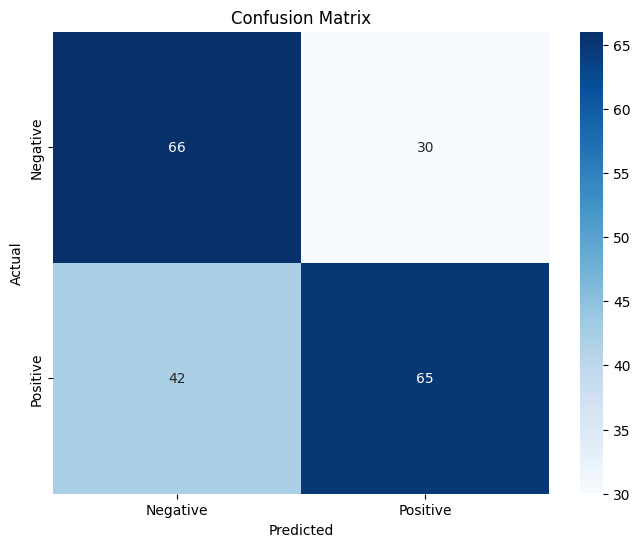

In [55]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Evaluasi hasil prediksi
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[207  67]
 [ 43  40]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       274
           1       0.37      0.48      0.42        83

    accuracy                           0.69       357
   macro avg       0.60      0.62      0.61       357
weighted avg       0.72      0.69      0.70       357



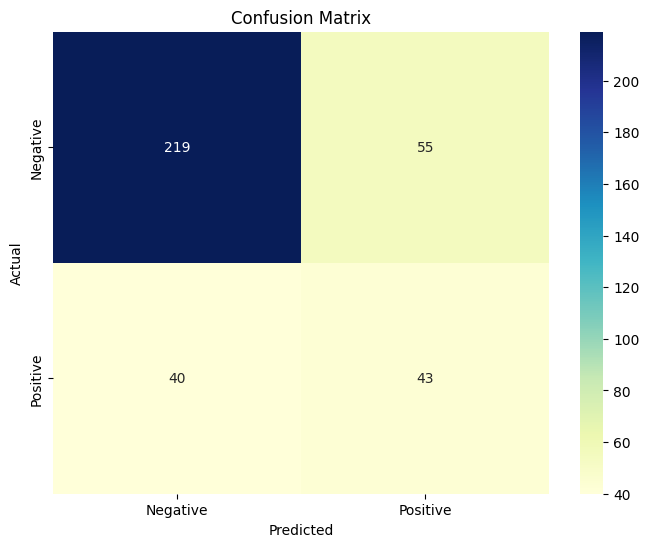

In [43]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()